In [19]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

## Données

dimensions de X: (100, 2)
dimensions de y: (100, 1)


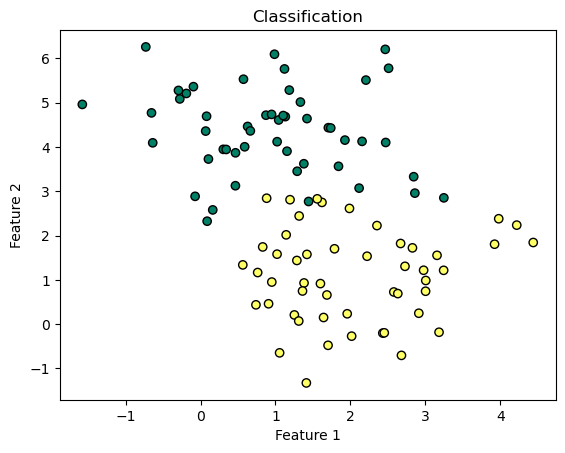

In [20]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2,random_state=0)

y = y.reshape(y.shape[0], 1)

print("dimensions de X:", X.shape)
print("dimensions de y:", y.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap="summer", edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Classification")
plt.show()


In [71]:
lim = 10
h = 100
W1 = np.linspace(-lim, lim, h)
W2 = np.linspace(-lim, lim, h)

W11, W22 = np.meshgrid(W1, W2)
W11.shape, W1.shape

((100, 100), (100,))

In [21]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [64]:
def model(X, W, b):
    Z = X @ W + b
    A = 1 / (1 + np.exp(-Z))
    return A

In [62]:
def log_loss(A, y):
    epsilon = 1e-15 # Tend vers 0 sans jamais l’atteindre, on l’ajoute aux logs pour éviter les log(0) non définit
    return 1 / len(y) * np.sum(-y * np.log(A + epsilon) - (1 - y) * np.log(1 - A + epsilon))

In [24]:
def gradients(A, X, y):
    dW = 1 / len(y) * np.dot(X.T, A - y)
    db = 1 / len(y) * np.sum(A - y)
    return (dW, db)


In [25]:
def update(dW, db, W, b, learning_rate): 
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return(W, b)

In [26]:
def predict(X, W, b):
    A = model(X, W, b)
    return A >= 0.5


In [27]:
from sklearn.metrics import accuracy_score

In [28]:
def artificial_neuron(X, y, learning_rate = 0.1, n_iter = 100):
    W, b = initialisation(X)

    Loss = []

    for _ in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)

    y_pred = predict(X, W, b)
    print("Accuracy : ", accuracy_score(y, y_pred))

    plt.plot(Loss)
    plt.show()

    return(W, b)

    

Importation des données

In [31]:
from utilities import load_data
X_train, y_train, X_test, y_test = load_data()

Dataset Train

In [32]:
print(X_train.shape)
print(y_train.shape)
print(np.unique(y_train, return_counts=True))

(1000, 64, 64)
(1000, 1)
(array([0., 1.]), array([500, 500], dtype=int64))


Dataset Test

In [33]:
print(X_test.shape)
print(y_test.shape)
print(np.unique(y_test, return_counts=True))

(200, 64, 64)
(200, 1)
(array([0., 1.]), array([100, 100], dtype=int64))


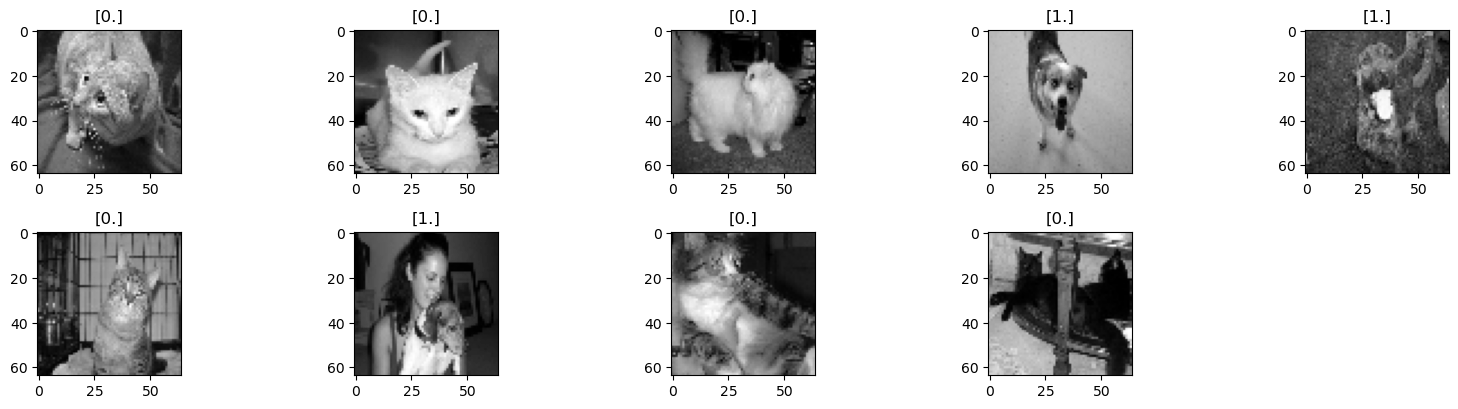

In [34]:
plt.figure(figsize=(16, 8))
for i in range(1, 10):
    plt.subplot(4, 5, i)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(y_train[i])
    plt.tight_layout()
plt.show()

## Entrainement du Modele

Passer X_train en 2D en multilpliant les 64x64 pixels dans la même dimension

In [ ]:
X_train_reshape = X_train.reshape(X_train.shape[0], -1) # -1 (Le reste) : X_train.shape[1] * X_train.shape[2]
X_train_reshape.shape

(1000, 4096)

In [41]:
X_test_reshape = X_test.reshape(X_test.shape[0], -1)
X_test_reshape.shape

(200, 4096)

C:\Users\agobbe\AppData\Local\Temp\ipykernel_4028\2444248616.py:3: RuntimeWarning: overflow encountered in exp
  A = 1 / (1 + np.exp(-Z))


Accuracy :  0.501


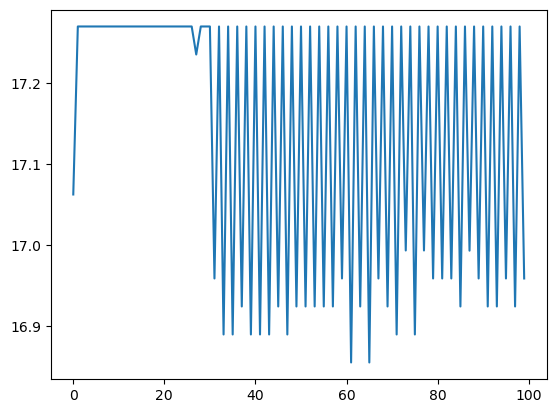

In [65]:
W, b = artificial_neuron(X_train_reshape, y_train)

![training_error](cat_or_dog_png/training_error.png "training_error")

Les exponentielles de notre model retournes des 0 et 1. Or notre fonction cout les reçoit et lorsque un log reçoit 0, cela fait une erreure car log n’est pas définit en 0.

Pour Résoudre ce soucis, nous allons faire intervenir epsilon dans notre fonction log loss pour éviter les 0 (Bonne pratique dans la fonction log loss)

Ensuite il faut normaliser nos données pour régler le soucis des exponentielles trop grandes (Bonne pratique lorsqu’on utilise la descente de gradient)